<a href="https://colab.research.google.com/github/manasvifulluke/Major-Project-/blob/main/Final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install squarify

In [2]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel(r'/content/Online Retail.xlsx')
data = data.dropna()
data.drop_duplicates(keep='first', inplace=True)
retail = data.copy()

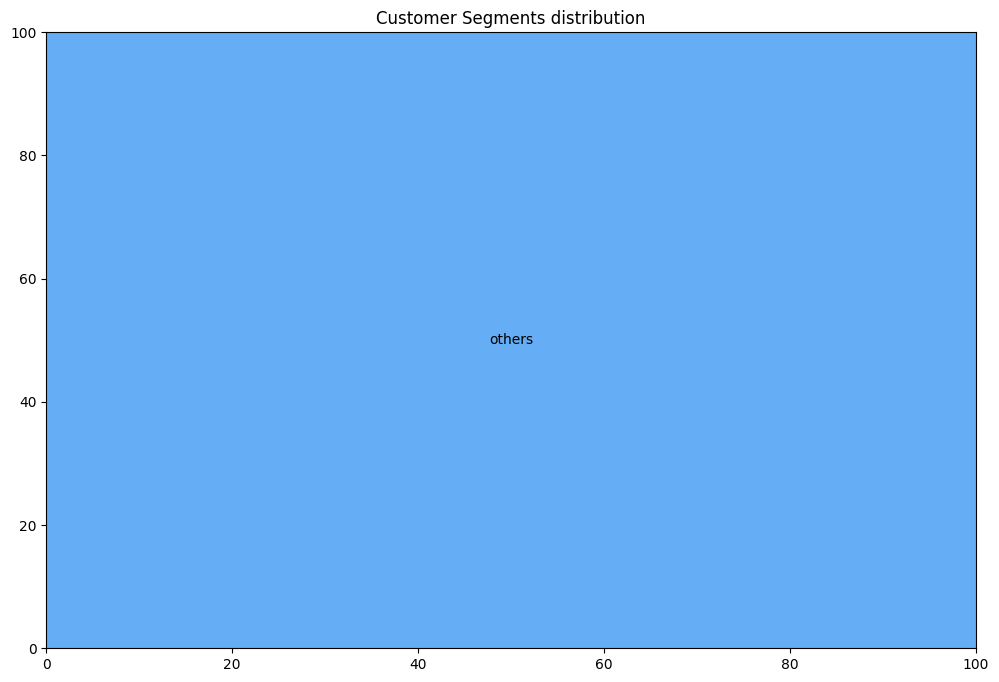

In [4]:
#rfm analysis
retail['MonetaryValue'] = retail['Quantity'] * retail['UnitPrice']
retail_mv = retail.groupby(['CustomerID']).agg({'MonetaryValue': sum}).reset_index()
retail_f = retail.groupby('CustomerID')['InvoiceNo'].count()
retail_f = retail_f.reset_index()
retail_mv_f = pd.merge(retail_mv, retail_f, on='CustomerID', how='inner')
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date = max(retail['InvoiceDate'])
retail['Diff'] = max_date - retail['InvoiceDate']
retail_r = retail.groupby('CustomerID')['Diff'].min()
retail_r = retail_r.reset_index()
retail_r['Diff'] = retail_r['Diff'].dt.days
retail_rfm = pd.merge(retail_mv_f, retail_r, on='CustomerID', how='inner')
retail_rfm.columns = ['CustomerID', 'MonetaryValue', 'Frequency', 'Recency']
cols = ['CustomerID', 'Recency', 'Frequency', 'MonetaryValue']
retail_rfm = retail_rfm[cols]
r_labels = range(4, 0, -1)
r_groups = pd.qcut(retail_rfm.Recency, q = 4, labels = r_labels)
f_labels = range(1, 5)
f_groups = pd.qcut(retail_rfm.Frequency, q = 4, labels = f_labels)
m_labels = range(1, 5)
m_groups = pd.qcut(retail_rfm.MonetaryValue, q = 4, labels = m_labels)
retail_rfm['R'] = r_groups.values
retail_rfm['F'] = f_groups.values
retail_rfm['M'] = m_groups.values
retail_rfm['RFM_Segment'] = retail_rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
retail_rfm['RFM_Score'] = retail_rfm[['R', 'F', 'M']].sum(axis = 1)
segment_dict = {
    'Best Customers':'444',      # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344',     # High frequency as well as monetary value with good recency
    'Potential Loyalists':'434', # High recency and monetary value, average frequency
    'Big Spenders':'334',        # High monetary value but good recency and frequency values
    'At Risk Customers':'244',   # Customer's shopping less often now who used to shop a lot
    'Can’t Lose Them':'144',      # Customer's shopped long ago who used to shop a lot.
    'Recent Customers':'443',    # Customer's who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers':'122' # Customer's shopped long ago but with less frequency and monetary value
}
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))
retail_rfm['Segment'] = retail_rfm.RFM_Segment.map(lambda x: dict_segment.get(x))
retail_rfm.Segment.fillna('others', inplace=True)
retail_rfm_segments = retail_rfm[retail_rfm.Segment!='other'].groupby('Segment')['CustomerID'].count().reset_index(name='counts')
segment = list(retail_rfm_segments.iloc[:8].Segment)
score = list(retail_rfm_segments.iloc[:8].counts)
color_list = ["#248af1", "#eb5d50", "#8bc4f6", "#8c5c94", "#a170e8", "#fba521", "#75bc3f"]
plt.figure(figsize=(12,8))
plt.title('Customer Segments distribution')
squarify.plot(sizes=score, label=segment,color=color_list, alpha=0.7)
plt.show()

In [5]:
#extracting best, loyal and potential customers
customers=retail_rfm[retail_rfm['RFM_Segment']=='444'].sort_values('MonetaryValue', ascending=False)
customers=customers.append(retail_rfm[retail_rfm['RFM_Segment']=='344'].sort_values('MonetaryValue', ascending=False))
customers=customers.append(retail_rfm[retail_rfm['RFM_Segment']=='434'].sort_values('MonetaryValue', ascending=False))
customers.to_excel(r'C:\Users\user\Desktop\Customer-Analytics-master\customers.xlsx')

<ipython-input-5-49d44cbeadff>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customers=customers.append(retail_rfm[retail_rfm['RFM_Segment']=='344'].sort_values('MonetaryValue', ascending=False))
<ipython-input-5-49d44cbeadff>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customers=customers.append(retail_rfm[retail_rfm['RFM_Segment']=='434'].sort_values('MonetaryValue', ascending=False))
